In [1]:
import torch
import mmcv
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot

/home/user/anaconda3/envs/crack_gauge/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config_file = '../configs/uos_crack/cgnet_uos_crack.py'
checkpoint_file = '../checkpoints/cgnet_uos_crack.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda:0')

/home/user/anaconda3/envs/crack_gauge/lib/python3.10/site-packages/mmseg/models/decode_heads/decode_head.py:120: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert `seg_logits` into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we suggest using'
/home/user/anaconda3/envs/crack_gauge/lib/python3.10/site-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/user/anaconda3/envs/crack_gauge/lib/python3.10/site-packages/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ../checkpoints/cgnet_uos_crack.pth


In [4]:
# test a single image
img = '/media/user/WDS/#data/v0.1.2/leftImg8bit/val/20210120_090112_leftImg8bit.png'
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)

result = inference_model(model, img)

05/05 16:29:45 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


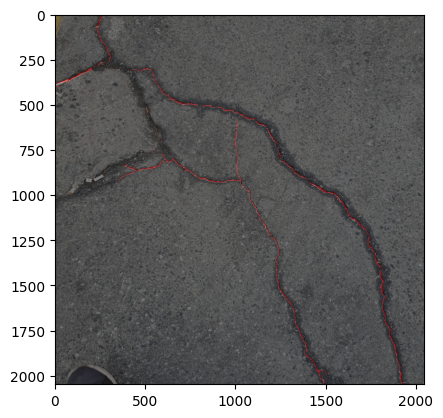

In [5]:
# show the results
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))